**Question 1**

---

For an application on credit card fraud detection, we are interested in detecting contextual outliers. Suggest 2 possible contextual attributes and 2 possible behavioural attributes that could be used for this application, and explain why each of your suggested attribute should be considered as either contextual or behavioural.


**Solution**

---

Let’s say that we want to detect credit card frauds.
Contextual attributes: 1. Location of transaction, 2. Kind of the transaction 
1.	Consider a customer that makes transactions on specific region. If a transaction is made in another region by the ‘same customer’, it may be detected as a credit card fraud. 
2.	A behavior can be considered as outlier based on the kind of the transaction. If a client buys specific items and suddenly starts buying different items, it may be a credit card fraud. 

Behavioural attributes: 1. Daily transactions, 2. Amount of the transaction 
1.	 Consider we want to measure daily transactions based on the context kind of the transaction to detect frauds. Daily would be the behavioural attribute.
2.	 Consider we want to measure the amount of the transaction based on the location of the transaction that takes place to detect frauds. Amount is the behavioural attribute 


**Question 2** 

---


Assume that you are provided with the University of Wisconsin breast cancer dataset, and that you are asked to detect outliers from this dataset. Additional information on the dataset attributes can be found online. Explain one possible outlier detection method that you could apply for detecting outliers for this particular dataset, explain what is defined as an outlier for your suggested approach given this particular dataset, and justify why would you choose this particular method for outlier detection.


**Solution**

---


One possible outlier detection method that you could apply for detecting outliers for this particular dataset is Mahalanobis Distance. In the university of Wisconsin breast cancer dataset there are 9 attributes (not including ‘Sample Code’ and the categorical feature ‘Class’). Mahalanobis distance is an effective distance metric for multivariate datasets like this one. It transforms the multivariate outlier detection task into a univariate outlier detection task. In order to find outliers, Mahalanobis distance calculates the distance between every point and center in n-dimension data. If the distance of a point is higher than the other, it is an outlier. 


**Question 3** 

---


The monthly rainfall in the London borough of Tower Hamlets in 2018 had the following amount of precipitation (measured in mm, values from January-December 2018): {22.93, 20.59, 25.65, 23.74, 25.24, 4.55, 23.45, 28.18, 23.52, 22.32, 26.73, 23.42}. Assuming that the data is based on a normal distribution, identify outlier values in the above dataset using the maximum likelihood method.


**Solution**

---



In [ ]:
import numpy as np
data = [22.93, 20.59, 25.65, 23.74, 25.24, 4.55, 23.45, 28.18, 23.52, 22.32, 26.73, 23.42]
mean = np.mean(data)
std = np.std(data)
print('mean of the dataset is', mean)
print('std. deviation is', std) 
outlier = []
for i in data:
    z = (i-mean)/std
    if (z > 3) or (z < -3) :
        outlier.append(i)
print('outlier in dataset is', outlier)

mean of the dataset is 22.526666666666667
std. deviation is 5.758845852734344
outlier in dataset is [4.55]


**Question 4** 

---


You are provided with the graduation rate dataset used in the Week 4 lab (file graduation_rate.csv in the Week 4 lab supplementary data). For the 'high school gpa' attribute, compute the relative frequency (i.e. frequency normalised by the size of the dataset) of each value. Show these computed relative frequencies in your report. Two new data points are included in the dataset, one with a 'high school gpa' value of 3.6, and one with a 'high school gpa' value of 2.8. Using the above computed relative frequencies, which of the two new data points would you consider as an outlier and why?


**Solution**

---


Between the two new data points (2.8,3.6), I would consider 2.8 as an outlier, because its relative frequency is rather small compared to 3.6. 


In [ ]:
import pandas as pd
df = pd.read_csv('graduation_rate.csv') 
#value_counts() to count the number of occurrences of yhat 
data = pd.Series(df['high school gpa']).value_counts() 
print(data / len(df['high school gpa'])) 

4.0    0.294
3.8    0.132
3.9    0.108
3.7    0.106
3.6    0.101
3.5    0.071
3.4    0.064
3.3    0.052
3.2    0.025
3.0    0.020
3.1    0.015
2.9    0.008
2.7    0.003
2.8    0.001
Name: high school gpa, dtype: float64


We can compute the relative frequencies as percentages multiplying by 100:

In [ ]:
data = pd.Series(df['high school gpa']).value_counts() 
print(data / len(df['high school gpa']) * 100) 

4.0    29.4
3.8    13.2
3.9    10.8
3.7    10.6
3.6    10.1
3.5     7.1
3.4     6.4
3.3     5.2
3.2     2.5
3.0     2.0
3.1     1.5
2.9     0.8
2.7     0.3
2.8     0.1
Name: high school gpa, dtype: float64


**Question 5** 

---


Using the stock prices dataset used in sections 1 and 2, estimate the outliers in the dataset using the one-class SVM classifier approach. As input to the classifier, use the percentage of changes in the daily closing price of each stock, as was done in section 1 of the notebook. Plot a 3D scatterplot of the dataset, where each object is color-coded according to whether it is an outlier or an inlier. Also compute a histogram and the frequencies of the estimated outlier and inlier labels. In terms of the plotted results, how does the one-class SVM approach for outlier detection differ from the parametric and proximity-based methods used in the lab notebook? What percentage of the dataset objects are classified as outliers?


**Solution**

---

*Estimate the outliers in the dataset using the one-class SVM classifier.*

In [ ]:
from pandas import read_csv
import pandas as pd
import numpy as np

# Loading the dataset
stocks = pd.read_csv('stocks.csv', header='infer') 
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'],axis=1) 
N,d = stocks.shape
# Compute delta, which denotes the percentage of changes in the d aily closing price of each stock
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values- 
stocks.iloc[:N-1,:].values, stocks.iloc[:N-1,:].values), columns=stocks.columns, index=stocks.iloc[1:] 
.index)
from sklearn.svm import OneClassSVM 
ee = OneClassSVM(nu=0.01,gamma='auto') 
yhat = ee.fit_predict(delta) 

*3D scatterplot of the dataset.*

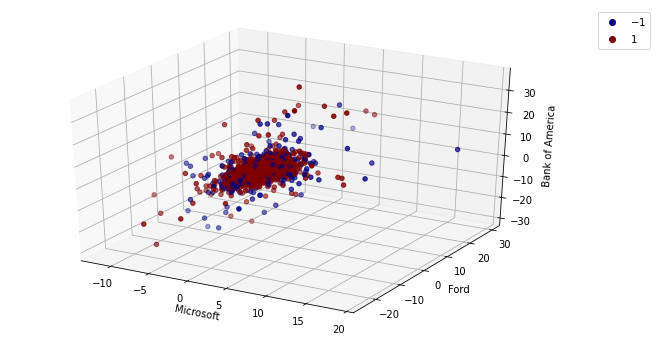

In [ ]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta.MSFT,delta.F,delta.BAC,c=yhat,cmap='jet') 
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America') 
plt.legend(*p.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2) 
plt.show() 

*Histogram of outliers and inliers.*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


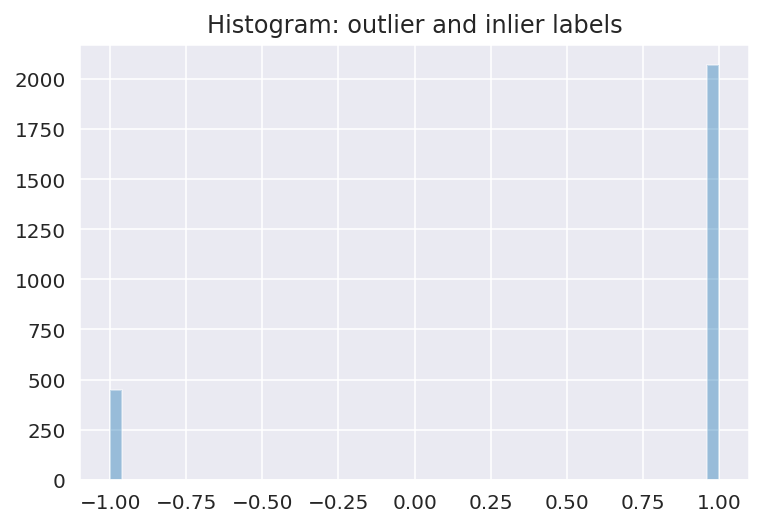

In [ ]:
%config InlineBackend.figure_formats = set(['retina']) 
import seaborn as sns
sns.set_style('darkgrid')
sns.distplot(yhat, bins=None, kde=False) 
plt.title('Histogram: outlier and inlier labels') 
plt.show() 


*Frequencies*

In [ ]:
#value_counts() to count the number of occurrences of yhat 
freq = pd.Series(yhat).value_counts() 
print(freq) 

 1    2069
-1     448
dtype: int64


*Percentage of outliers* 

If we consider -1 label from the relative frequencies and multiply it by 100 we can take the percentage of outliers in dataset, which is 0.17799 * 100 = 17.799 %. 


In [ ]:
freq = pd.Series(yhat).value_counts() 
print(freq / len(yhat))

 1    0.82201
-1    0.17799
dtype: float64


*Conclusions*

As it is clear from the plots in the lab sheet, using different outlier detection approaches 
define different objects as outliers in the same dataset. 
•	One-class model: It is built to describe only the normal class. Learns the decision boundary of the normal class using classification methods. Any samples that do not belong to the normal class are defines as outliers. 

•	Proximity-based approaches and parametric methods: These define observations as outliers based on estimated outlier score, which is based on how far the observations are from their neighbours. 


**Question 6** 

---


This question will combine concepts from both data preprocessing and outlier detection. Using the house prices dataset from https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv and
perform dimensionality reduction on the dataset using PCA with 2 principal components (make sure that the dataset is z-score normalised beforehand, and remember that PCA should only be applied on the input attributes). Then, perform outlier detection on the pre-processed dataset using the k-nearest neighbours approach using k=2. Display a scatterplot of the two principal components, where each object is colour-coded according to the computed outlier score. Information and metadata about the dataset can be found at: https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names


**Solution**

---



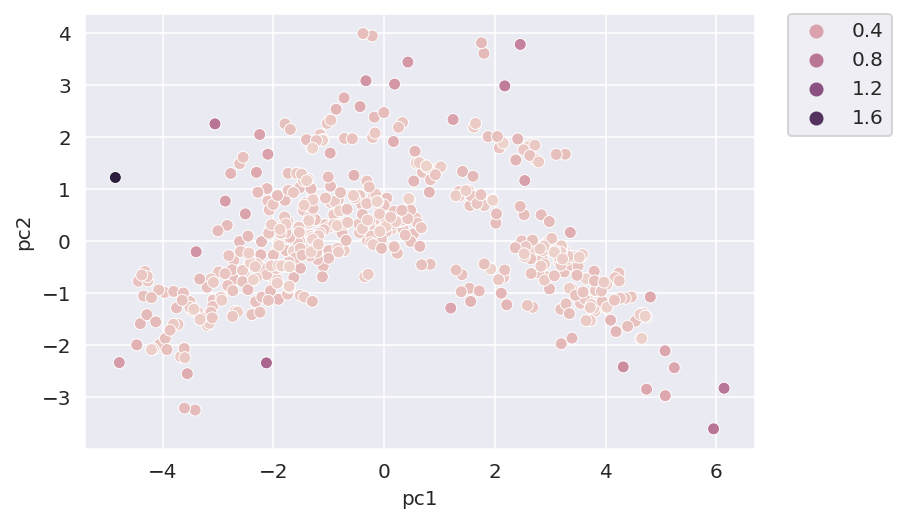

In [ ]:
from pandas import read_csv
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Loading the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None) 
# Extracting the values from the dataframe 
data = df.values

# Split dataset into input and output elements
X, y = data[:, :-1], data[:, -1]
x = StandardScaler().fit_transform(X) 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors 
import numpy as np
from scipy.spatial import distance

# this code reduces dimensionality of dataset to 2 dimensions using PCA.
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
df_projection = pd.DataFrame({'pc1': principalComponents[:, 0], 'pc2': principalComponents[:, 1]}) 
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(df_projection.values)
distances, indices = nbrs.kneighbors(df_projection.values)

# The outlier score is set as the distance between the point and its k-th nearest neighbour
outlier_score = distances[:,knn-1] 
sns.scatterplot(x='pc1', y='pc2', hue=outlier_score, data=df_projection)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
plt.show()
